In [ ]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

# Check ellipticities directly from table

In [ ]:
catsim_file = "../../../data/OneDegSq.fits"
catsim_table = Table.read(catsim_file)
table = catsim_table[catsim_table['i_ab'] < 27.3]
len(table)

666475

In [ ]:
table

galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2200871446,0.418319702147,-0.000148399994941,0.496377289295,0.0,1.4144730572e-17,0.0,0.0,0.278649687767,0.0,0.221303001046,0.0,307.344329834,25.9418621063,25.129743576,23.9588813782,23.3607368469,23.0723800659,22.9095973969
2205921112,0.420028448104,-0.00100259995088,1.89508104324,0.0,1.91501907101e-18,0.0,0.0,0.358063697815,0.0,0.313674807549,0.0,137.791702271,25.848903656,25.867565155,25.9179477692,25.9851398468,25.8779563904,25.7642536163
2205010878,0.423432350157,-0.00312969996594,1.93795013428,0.0,2.15612608955e-18,0.0,0.0,0.444279909134,0.0,0.424689114094,0.0,233.972427368,25.5657653809,25.5659580231,25.6165962219,25.6957893372,25.6281528473,25.5399188995
2208734677,0.42108619213,-7.25999998394e-05,1.16251754761,0.0,1.74001598433e-18,0.0,0.0,0.312852591276,0.0,0.180962398648,0.0,217.517120361,27.3159255981,27.4167633057,27.051820755,26.6737632751,25.9380722046,25.6458129883
2212241881,0.423181056976,-0.00218109996058,1.35479903221,0.0,1.11031595423e-18,0.0,0.0,0.414316505194,0.0,0.205554202199,0.0,226.523849487,27.3325939178,27.4470024109,27.3282527924,27.0680370331,26.7419490814,26.1817016602
2204477290,0.422583341599,-0.000604000000749,1.33114361763,0.0,5.75775484903e-18,0.0,0.0,0.351797997952,0.0,0.126827403903,0.0,53.955165863,25.6527175903,25.7753200531,25.4755821228,25.2793464661,24.9572029114,24.4631252289
2201104165,0.422105312347,-0.00160690001212,0.812159895897,6.57883086866e-18,2.26453001134e-17,0.0,0.22702370584,0.191140606999,0.20540009439,0.0433686003089,24.3779182434,24.3779182434,25.9493045807,25.4186573029,24.5099773407,23.527223587,23.0481529236,22.813867569
2211831084,0.422278761862,-0.00242089992389,1.52316868305,0.0,1.06012697736e-18,0.0,0.0,0.216705903411,0.0,0.123286098242,0.0,13.71824646,27.2072696686,27.268491745,27.2910671234,27.0573310852,26.8970832825,26.4211711884
2209679020,0.426987767219,-0.00824970006943,0.95235222578,0.0,1.05405795321e-18,0.0,0.0,0.313734412193,0.0,0.129461601377,0.0,136.195404053,26.9098415375,27.0086174011,26.8457508087,26.6200237274,26.4114837646,26.3559627533


In [ ]:
fb, fd, fagn = table['fluxnorm_bulge'], table['fluxnorm_disk'], table['fluxnorm_agn']
ffb = fb / (fb + fd + fagn)
ffd = fd / (fb + fd + fagn)

In [ ]:
table['pa_bulge'].max()

359.998901367

In [ ]:
assert np.all(np.equal(ffd > 0, table['pa_disk']>0))
assert np.all(np.equal(ffd ==0, table['pa_disk']==0))
assert np.all(np.equal(ffb > 0, table['pa_bulge']>0))
assert np.all(np.equal(ffb ==0, table['pa_bulge']==0))

In [ ]:
np.logical_or(ffb>0, ffd>0).sum(), len(table)

(666475, 666475)

(array([  3443.,   1320.,   1411.,   1412.,   1430.,   1423.,   1591.,
          1830.,   1865.,   1965.,   2047.,   2330.,   2566.,   2747.,
          2921.,   3348.,   3621.,   4156.,   4739.,   5735.,   7370.,
         10036.,  16377.,  37687., 536050.]),
 array([2.42685770e-07, 4.00002330e-02, 8.00002233e-02, 1.20000214e-01,
        1.60000204e-01, 2.00000194e-01, 2.40000184e-01, 2.80000175e-01,
        3.20000165e-01, 3.60000155e-01, 4.00000146e-01, 4.40000136e-01,
        4.80000126e-01, 5.20000116e-01, 5.60000107e-01, 6.00000097e-01,
        6.40000087e-01, 6.80000078e-01, 7.20000068e-01, 7.60000058e-01,
        8.00000049e-01, 8.40000039e-01, 8.80000029e-01, 9.20000019e-01,
        9.60000010e-01, 1.00000000e+00]),
 <BarContainer object of 25 artists>)

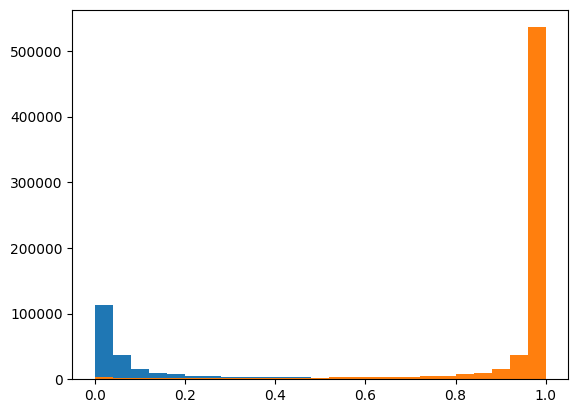

In [ ]:
_, bins, _ = plt.hist(ffb[ffb> 0], bins=25)
plt.hist(ffd[ffd> 0], bins=bins)

In [ ]:
# we want to compute ellipticites from the table to have a sense of their distributions
# see if it then matches the measured one from adaptive moments and the detected one later on that
# we use for paper results

# lets look at both bulge and disk separately for now (look at fractions of disk and bulge too)

In [ ]:
sum(np.logical_and(ffb==0, ffd==0))

0

In [ ]:
a_d, b_d = table['a_d'], table['b_d']
a_b, b_b = table['a_b'], table['b_b']
pa_bulge, pa_disk = table['pa_bulge'], table['pa_disk']

e1d = [] 
e2d = []
# let's get the disk one first
for ii in range(len(table)):
    a = a_d[ii]
    b = b_d[ii]
    f = ffd[ii]
    beta = pa_disk[ii] * np.pi / 180 # radians
    if f > 0:
        assert a > 0 and b > 0 and beta > 0
        e1 = (a - b)/ (a + b) * np.cos(2 * beta)
        e2 = (a - b)/ (a + b) * np.sin(2 * beta)
    else: 
        e1, e2 = np.nan, np.nan
    e1d.append(e1)
    e2d.append(e2)

e1d = np.array(e1d)
e2d = np.array(e2d)

# betas = [] 
# for beta1, beta2 in zip(pa_bulge, pa_disk):
#     if beta1 > 0: 
#         if beta2 > 0: 
#             assert beta1 == beta2
#         betas.append(beta1)
#     else:
#         assert beta2 > 0
#         betas.append(beta2)
# betas = np.array(betas)
        

# e1_d = (a_d - b_d)/ (a_d + b_d) * np.cos(2 * beta)
# e2_d = (a_d - b_d)/ (a_d + b_d) * np.sin(2 * beta)

In [ ]:
a_d, b_d = table['a_d'], table['b_d']
a_b, b_b = table['a_b'], table['b_b']
pa_bulge, pa_disk = table['pa_bulge'], table['pa_disk']

e1b = [] 
e2b = []
# let's get the bulge now
for ii in range(len(table)):
    a = a_b[ii]
    b = b_b[ii]
    f = ffb[ii]
    beta = pa_bulge[ii] * np.pi / 180 # radians
    if f > 0:
        assert a > 0 and b > 0 and beta > 0
        e1 = (a - b)/ (a + b) * np.cos(2 * beta)
        e2 = (a - b)/ (a + b) * np.sin(2 * beta)
    else: 
        e1, e2 = np.nan, np.nan
    e1b.append(e1)
    e2b.append(e2)

e1b = np.array(e1b)
e2b = np.array(e2b)

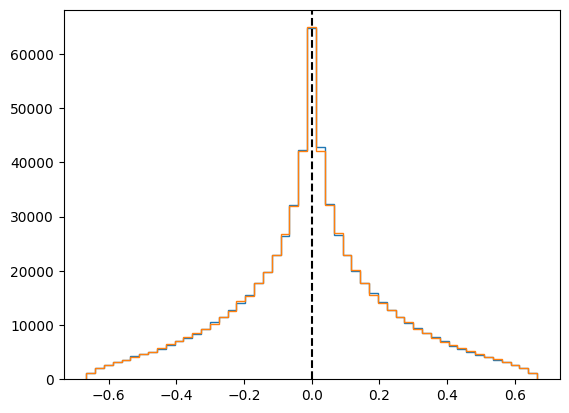

In [ ]:
mask = ~np.isnan(e1d)
_, bins, _ = plt.hist(e1d[mask], bins=51, histtype='step')
plt.hist(e2d[mask], bins=bins, histtype='step')
plt.axvline(0.0, linestyle='--', color='k')

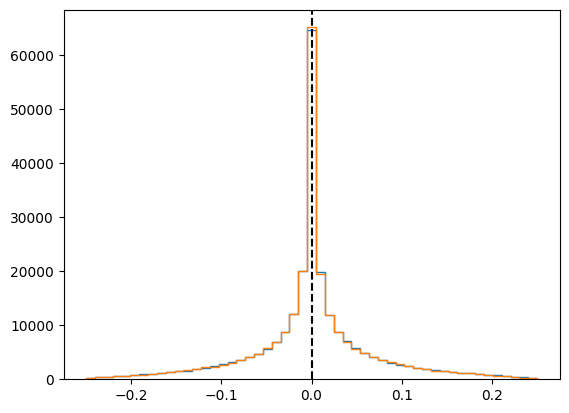

In [ ]:
mask = ~np.isnan(e1b)
_, bins, _ = plt.hist(e1b[mask], bins=51, histtype='step')
plt.hist(e2b[mask], bins=bins, histtype='step')
plt.axvline(0.0, linestyle='--', color='k')

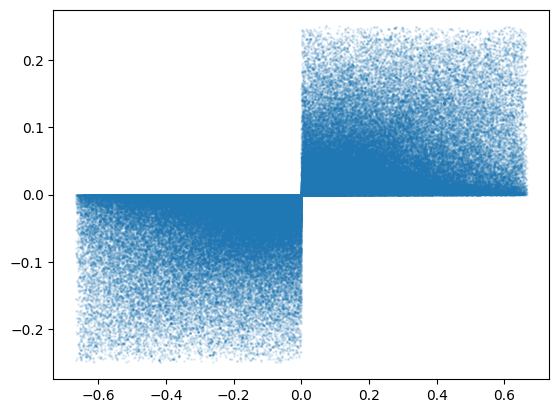

In [ ]:
# ellipticites scatter from each?????
mask = ~np.isnan(e1d) & ~np.isnan(e1b)
e11 = e1d[mask]
e12 = e1b[mask]
assert len(e11) == len(e12)
plt.scatter(e11, e12, alpha=0.1, s=1)

# Ellipticity from the PSF

In [ ]:
import galsim
from bliss.datasets.lsst import get_default_lsst_psf
import matplotlib.pyplot as plt
psf = get_default_lsst_psf()

In [ ]:
psf.calculateFWHM()

0.8003397403887131

In [ ]:
psf_image = psf.drawImage(nx=53, ny=53, scale=0.2)

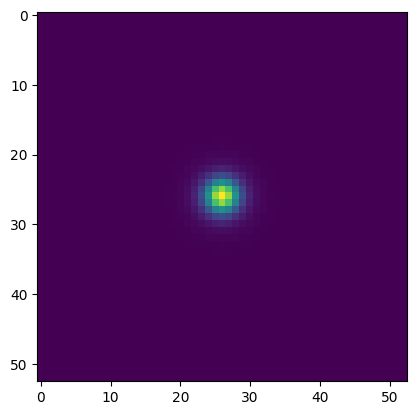

In [ ]:
plt.imshow(psf_image.array)

In [ ]:
out = galsim.hsm.FindAdaptiveMom(psf_image, guess_sig=0.3, strict=False)
out.observed_e1, out.observed_e2

(0.0, 0.0)

In [ ]:
galsim.Gaussian(fwhm=0.8).sigma

0.33972872011520766

# Check ellipticity measured from actual single galaxy images

In [ ]:
import torch

In [ ]:
from bliss.datasets.table_utils import column_to_tensor

n_samples = 10000

# catsim
catsim_file = "../../../data/OneDegSq.fits"
catsim_table = Table.read(catsim_file)
new_table = catsim_table[catsim_table['i_ab'] < 27.3]

# stars
stars_file = "../../../data/stars_med_june2018.fits"
all_star_mags = column_to_tensor(Table.read(stars_file), "i_ab")
new_all_star_mags = all_star_mags[all_star_mags > 20]



In [ ]:
from bliss.datasets.lsst import get_default_lsst_psf
psf = get_default_lsst_psf()

In [ ]:
from bliss.datasets.galsim_blends import generate_dataset

dataset = generate_dataset(
    n_samples,
    new_table,
    new_all_star_mags,
    psf=psf,
    max_n_sources=1,
    galaxy_density=1000,
    star_density=0,
    slen=53,
    bp=0,
    max_shift=0,
    add_galaxies_in_padding=False,
)

100%|██████████| 10000/10000 [07:14<00:00, 23.04it/s]


In [ ]:
images = dataset['images']
noiseless = dataset['noiseless']

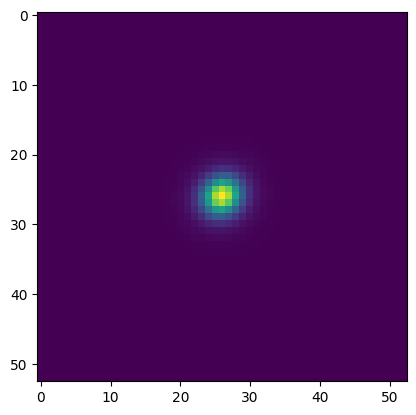

In [ ]:
plt.imshow(noiseless[32,0])

In [ ]:
assert torch.all(dataset['n_sources'] > 0)

In [ ]:
from bliss.reporting import get_single_galaxy_ellipticities
ellips = get_single_galaxy_ellipticities(noiseless[:, 0], 0.2, no_bar=False)

Measuring galaxies: 100%|██████████| 10000/10000 [00:06<00:00, 1493.24it/s]


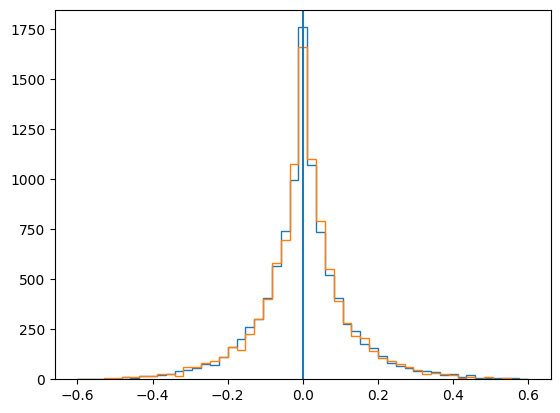

In [ ]:
_, bins, _ = plt.hist(ellips[:, 0], bins=51, histtype='step', range=(-.6, .6))
plt.hist(ellips[:, 1], bins=bins, histtype='step', range=(-.6, .6))
plt.axvline(0.0)

In [ ]:
fluxes = images[:, 0].sum(axis=(-1, -2))

# Check ellipticiites and fluxes from saved dataset

In [ ]:
import torch

In [ ]:
# catsim
catsim_file = "../../../data/OneDegSq.fits"
catsim_table = Table.read(catsim_file)
new_table = catsim_table[catsim_table['i_ab'] < 27.3]

In [ ]:
t = torch.load("../data/datasets/train_ae_ds_4_42_test.pt")

In [ ]:
t['images'].shape

torch.Size([32000, 1, 53, 53])

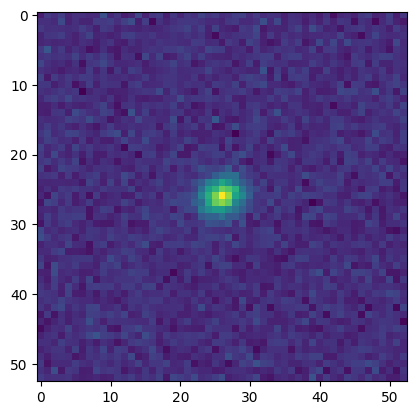

In [ ]:
# check images
plt.imshow(t['images'][13, 0])

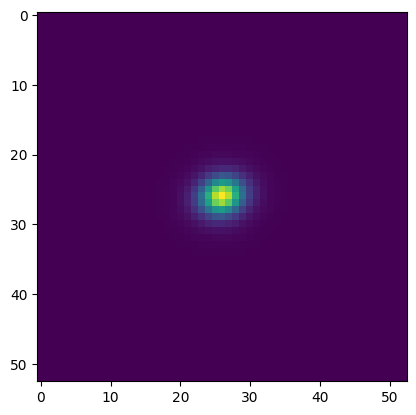

In [ ]:
plt.imshow(t['noiseless'][13,0])

In [ ]:
flux = t['noiseless'].sum(axis=(-1, -2, -3))
flux.shape

torch.Size([32000])

(array([1.5896e+04, 9.0670e+03, 4.1680e+03, 1.8610e+03, 6.5600e+02,
        2.5400e+02, 7.0000e+01, 2.4000e+01, 3.0000e+00, 1.0000e+00]),
 array([3.93394256, 4.41091537, 4.88788795, 5.36486053, 5.84183311,
        6.31880569, 6.79577827, 7.27275085, 7.74972343, 8.22669601,
        8.70366859]),
 <BarContainer object of 10 artists>)

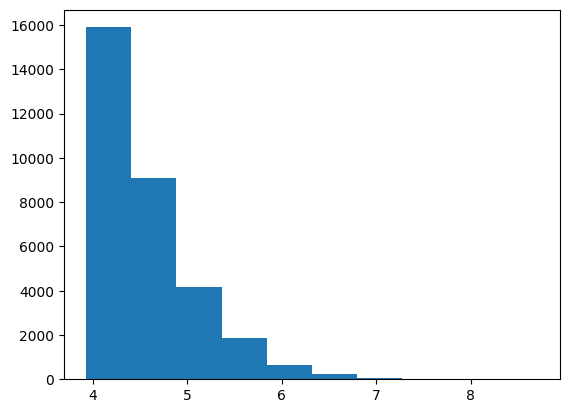

In [ ]:
plt.hist(t['galaxy_params'][:, -1].log10())

(array([2.0000e+00, 5.0000e+00, 6.9620e+03, 1.6458e+04, 6.0730e+03,
        1.9150e+03, 4.7700e+02, 9.0000e+01, 1.7000e+01, 1.0000e+00]),
 array([2.15402699, 2.80877113, 3.46351504, 4.11825895, 4.7730031 ,
        5.42774725, 6.0824914 , 6.73723555, 7.39197922, 8.04672337,
        8.70146751]),
 <BarContainer object of 10 artists>)

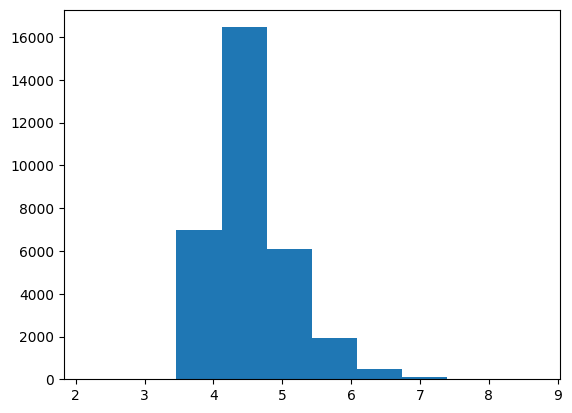

In [ ]:
plt.hist(flux.log10())

In [ ]:
# now ellipticities
from bliss.reporting import get_single_galaxy_ellipticities
ellips = get_single_galaxy_ellipticities(t['noiseless'][:, 0], 0.2, no_bar=False)

Measuring galaxies: 100%|██████████| 32000/32000 [00:08<00:00, 3934.80it/s]


In [ ]:
ellips.shape

torch.Size([32000, 2])

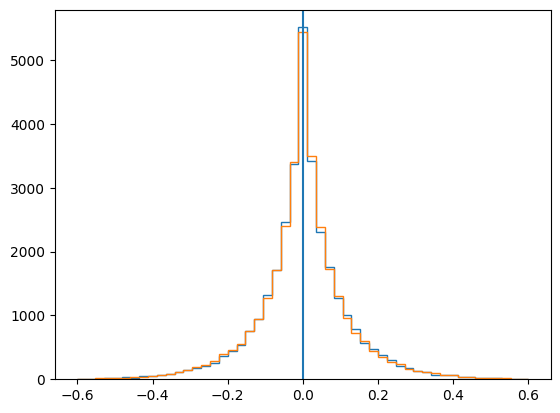

In [ ]:
_, bins, _ = plt.hist(ellips[:, 0], bins=51, histtype='step', range=(-.6, .6))
plt.hist(ellips[:, 1], bins=bins, histtype='step', range=(-.6, .6))
plt.axvline(0.0)